In [2]:
#Import libraries 
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from utils import functions as f

import os
import cv2
import pickle 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score

In [3]:
#Load the X_train, X_test, y_train, y_test

with open('./Pickle Files/Train Test Split/X_train', 'rb') as Xtrain_picle_in:
    X_train = pickle.load(Xtrain_picle_in)

with open('./Pickle Files/Train Test Split/X_test', 'rb') as Xtest_picle_in:
    X_test = pickle.load(Xtest_picle_in)
    
with open('./Pickle Files/Train Test Split/y_train', 'rb') as ytrain_picle_in:
    y_train = pickle.load(ytrain_picle_in)

with open('./Pickle Files/Train Test Split/y_test', 'rb') as ytest_picle_in:
    y_test = pickle.load(ytest_picle_in)

In [3]:
#Check the shape of X_train, X_test and y_train y_test

print(f'Shape of X_train is: {X_train.shape}')
print(f'Shape of X_test is: {X_test.shape}')
print(f'Shape of y_train is: {y_train.shape}')
print(f'Shape of y_test is: {y_test.shape}')

Shape of X_train is: (5130, 224, 224, 3)
Shape of X_test is: (1710, 224, 224, 3)
Shape of y_train is: (5130,)
Shape of y_test is: (1710,)


In [4]:
#Create the first Sequential model

model = Sequential()

model.add(Flatten(input_shape = (224, 224, 3)))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'bce', optimizer = 'Adam', metrics = ['acc'], run_eagerly=True)

In [5]:
history1 = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    batch_size = 64,
                    epochs = 10)

Epoch 1/10
81/81 [==============================] - 56s 596ms/step - loss: 4.5989 - acc: 0.5548 - val_loss: 0.6421 - val_acc: 0.5035
Epoch 2/10
81/81 [==============================] - 30s 372ms/step - loss: 0.6116 - acc: 0.6392 - val_loss: 0.5625 - val_acc: 0.8327
Epoch 3/10
81/81 [==============================] - 28s 347ms/step - loss: 0.5801 - acc: 0.6784 - val_loss: 0.5455 - val_acc: 0.7942
Epoch 4/10
81/81 [==============================] - 30s 369ms/step - loss: 0.5590 - acc: 0.6977 - val_loss: 0.4035 - val_acc: 0.8930
Epoch 5/10
81/81 [==============================] - 30s 367ms/step - loss: 0.5708 - acc: 0.7055 - val_loss: 0.4454 - val_acc: 0.9187
Epoch 6/10
81/81 [==============================] - 31s 381ms/step - loss: 0.5544 - acc: 0.7018 - val_loss: 0.4616 - val_acc: 0.8830
Epoch 7/10
81/81 [==============================] - 29s 354ms/step - loss: 0.5606 - acc: 0.6938 - val_loss: 0.3923 - val_acc: 0.9304
Epoch 8/10
81/81 [==============================] - 29s 361ms/step - 

In [6]:
#Save the model as Baseline model

model.save('./Saved Models/BaseLine_Model.h5')

In [7]:
#load the model
model = tf.keras.models.load_model('./Saved Models/BaseLine_Model.h5')

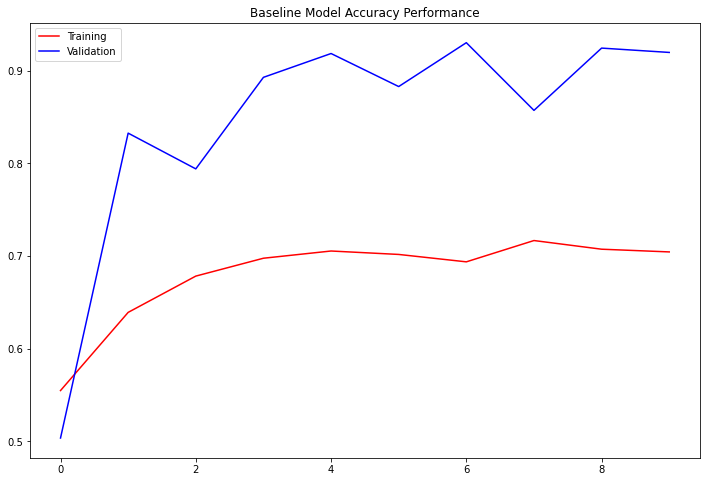

In [8]:
#Plot the 
plt.figure(figsize = (12,8))
plt.title('Baseline Model Accuracy Performance')
plt.plot(history1.history['acc'], label = 'Training', color = 'red')
plt.plot(history1.history['val_acc'], label = 'Validation', color = 'blue')
plt.legend();
plt.savefig('./Project Figs/Baseline_accuracy.jpg')

#### Check how the images are getting classified by score prediction

Model Predict: 0.36624783277511597


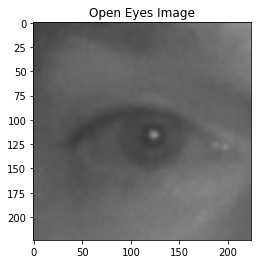

In [14]:
#Check how predict the images with open eyes

open_eyes = cv2.imread('D:/General_Assembly/projetcs/Capstone Project/mrlEyes_2018_01/s0018/s0018_04030_0_0_1_0_1_01.png', cv2.IMREAD_GRAYSCALE)
open_eyes = cv2.cvtColor(open_eyes, cv2.COLOR_GRAY2RGB)
open_eyes = cv2.resize(open_eyes, (224, 224))
open_eyes = open_eyes / 255.0
val_open_eyes = np.array(open_eyes).reshape(-1, 224, 224, 3)
print(f'Model Predict: {model.predict(val_open_eyes)[0][0]}')
plt.imshow(open_eyes, cmap = 'gray')
plt.title('Open Eyes Image');

Model Predict: 0.9195668697357178


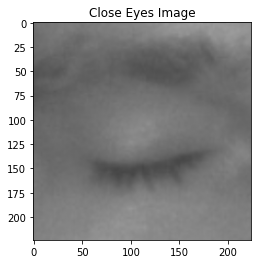

In [16]:
#Check how predict the images with closed eyes

close_eyes = cv2.imread('D:/General_Assembly/projetcs/Capstone Project/mrlEyes_2018_01/s0018/s0018_00660_0_0_0_0_1_01.png', cv2.IMREAD_GRAYSCALE)
close_eyes = cv2.cvtColor(close_eyes, cv2.COLOR_GRAY2RGB)
close_eyes = cv2.resize(close_eyes, (224, 224))
close_eyes = close_eyes / 255.0
val_close_eyes = np.array(close_eyes).reshape(-1, 224, 224, 3)
print(f'Model Predict: {model.predict(val_close_eyes)[0][0]}')
plt.imshow(close_eyes, cmap = 'gray')
plt.title('Close Eyes Image');

### Images with open eyes tend to be close to 0 and images with close eyes tend to be close to 1

In [18]:
#Make the prediction to my X_test
model_prediction = model.predict(X_test)

In [19]:
#I will assing to 1 the closed eyes (if number predicted is higher than 0.5 and 0 if prediction is less than 0.5)
model_prediction = [1 if x >= 0.5 else 0 for x in model_prediction]

In [20]:
#Check the recall score
print(f'Recall Score for Baseline Model is: {recall_score(y_test, model_prediction)}')

Recall Score for Baseline Model is: 0.9303135888501742


In [21]:
#Check the f1 score which is a better metrics for the average of recall and precision scores
print(f'F1 Score for Baseline Model is: {f1_score(y_test, model_prediction)}')

F1 Score for Baseline Model is: 0.9212190914318574


In [22]:
#Create the confusion matrix
conf_matrix = confusion_matrix(y_test, model_prediction)
conf_matrix

array([[772,  77],
       [ 60, 801]], dtype=int64)

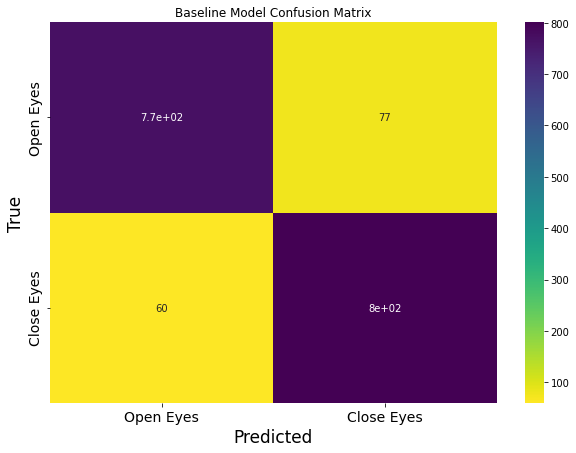

<Figure size 432x288 with 0 Axes>

In [29]:
#Plot the confusion matrix
plt.figure(figsize=(10,7))
fig = sns.heatmap(conf_matrix, annot = True, cmap = 'viridis_r')
fig.xaxis.set_ticklabels(['Open Eyes', 'Close Eyes'], fontsize = 14)
fig.yaxis.set_ticklabels(['Open Eyes', 'Close Eyes'], fontsize = 14)
fig.set_xlabel("Predicted",size=17)
fig.set_ylabel("True",size=17)
plt.title('Baseline Model Confusion Matrix')
plt.show()
plt.savefig('./Project Figs/baseline_conf_matrix.jpg')

### 2-nd Model

In [4]:
#Create the first Sequential model

model2 = Sequential()

model2.add(Conv2D(filters=16, kernel_size=(3, 3), input_shape = (224, 224, 3)))
model2.add(MaxPool2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(128, activation = 'relu'))
model2.add(Dropout(0.5))
model2.add(Dense(64, activation = 'relu'))

model2.add(Dense(1, activation = 'sigmoid'))

model2.compile(loss = 'bce', optimizer = 'Adam', metrics = ['acc'])

In [5]:
history2 = model2.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    batch_size = 64,
                    epochs = 10)

Epoch 1/10
81/81 [==============================] - 82s 945ms/step - loss: 1.3665 - acc: 0.6060 - val_loss: 0.5253 - val_acc: 0.8234
Epoch 2/10
81/81 [==============================] - 59s 729ms/step - loss: 0.4740 - acc: 0.7511 - val_loss: 0.2884 - val_acc: 0.9158
Epoch 3/10
81/81 [==============================] - 53s 657ms/step - loss: 0.3730 - acc: 0.8181 - val_loss: 0.2656 - val_acc: 0.8813
Epoch 4/10
81/81 [==============================] - 58s 716ms/step - loss: 0.3495 - acc: 0.8353 - val_loss: 0.2640 - val_acc: 0.9333
Epoch 5/10
81/81 [==============================] - 57s 705ms/step - loss: 0.3023 - acc: 0.8536 - val_loss: 0.2658 - val_acc: 0.8906
Epoch 6/10
81/81 [==============================] - 57s 707ms/step - loss: 0.3165 - acc: 0.8476 - val_loss: 0.1937 - val_acc: 0.9392
Epoch 7/10
81/81 [==============================] - 57s 702ms/step - loss: 0.2660 - acc: 0.8887 - val_loss: 0.2837 - val_acc: 0.8901
Epoch 8/10
81/81 [==============================] - 52s 642ms/step - 

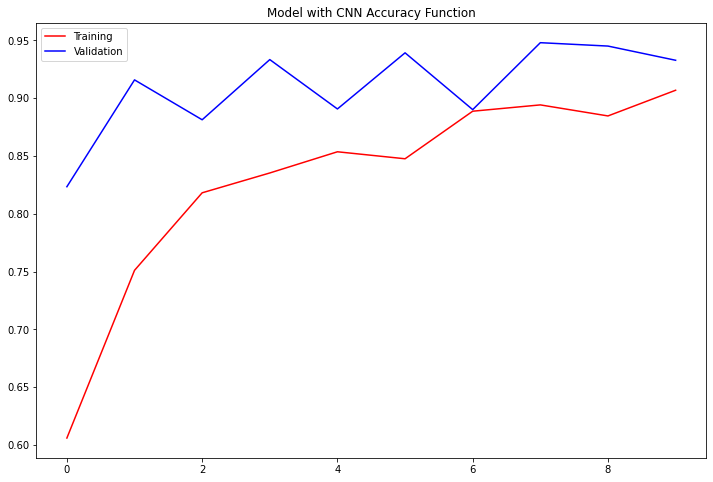

In [6]:
plt.figure(figsize = (12,8))
plt.title('Model with CNN Accuracy Function')
plt.plot(history2.history['acc'], label = 'Training', color = 'red')
plt.plot(history2.history['val_acc'], label = 'Validation', color = 'blue')
plt.legend();
plt.savefig('./Project Figs/model2.accuracy_perf.jpg')

In [71]:
#Save the model

model2.save('./Saved Models/Model2.h5')

In [9]:
#Load the model

model2 = tf.keras.models.load_model('./Saved Models/Model2.h5')

In [7]:
#Create predictions for model2
model2_predictions = model2.predict(X_test)

In [8]:
#Assing 1 if values of predictions are greater or equal to 0.5 and 0 otherwise
model2_predictions = [1 if x >= 0.5 else 0 for x in model2_predictions]

In [9]:
#Check the recall score
print(f'Recall Score For Model 2 is: {recall_score(y_test, model2_predictions)}')

Recall Score For Model 2 is: 0.9941927990708479


In [10]:
#Check the f1 score
print(f'F1 Score For Model 2 is: {f1_score(y_test, model2_predictions)}')

F1 Score For Model 2 is: 0.937055281882868


In [11]:
#Create the confusion matrix
conf_matrix2 = confusion_matrix(y_test, model2_predictions)
conf_matrix2

array([[739, 110],
       [  5, 856]], dtype=int64)

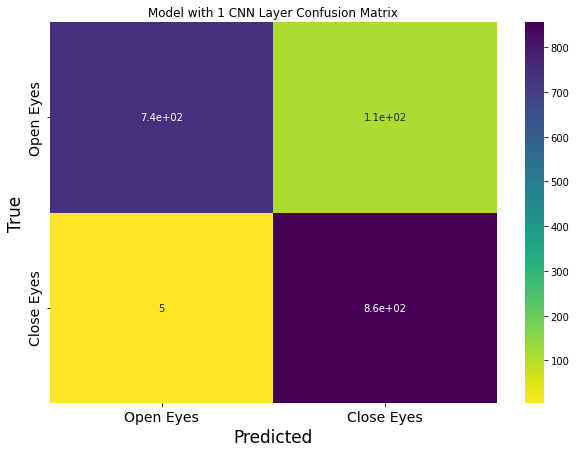

<Figure size 432x288 with 0 Axes>

In [12]:
#Plot the confusion matrix for model with i CNN layer
plt.figure(figsize=(10,7))
fig = sns.heatmap(conf_matrix2, annot = True, cmap = 'viridis_r')
fig.xaxis.set_ticklabels(['Open Eyes', 'Close Eyes'], fontsize = 14)
fig.yaxis.set_ticklabels(['Open Eyes', 'Close Eyes'], fontsize = 14)
fig.set_xlabel("Predicted",size=17)
fig.set_ylabel("True",size=17)
plt.title('Model with 1 CNN Layer Confusion Matrix')
plt.show()
plt.savefig('./Project Figs/model2_conf_matrix.jpg')